In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import gmplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [19]:
df = pd.read_csv("part3_data.csv")
df.describe()

,dates,latitude,longitude,quant1,quant2,quant3
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.467361e+09,1.026321,-0.082380,1.737077,0.031580,4980.333493
std,9.141892e+06,51.545570,103.546299,1.012192,17.456411,2889.413452
min,1.451612e+09,-89.995631,-179.756945,0.001356,-29.979777,0.723583
25%,1.459531e+09,-43.319612,-89.584439,0.854677,-15.223848,2490.176566
50%,1.467432e+09,1.219217,0.070930,1.726674,-0.234758,4920.907779
75%,1.475310e+09,46.321107,88.911360,2.618524,15.397590,7499.437028
max,1.483138e+09,89.974703,179.946696,3.499813,29.994035,9999.376454


In [42]:
def analysis(df):
    df.describe()
    df.mean()
    plt.rcParams['figure.figsize'] = (15,15)
    plt.scatter(df.latitude, df.longitude,c=np.arange(len(df.latitude)))
    plt.title("Spatial distribution of coordinates")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()
    gmap = gmplot.GoogleMapPlotter(40.088, -88.281, 16)
    # Scatter plot on Google Map
    gmap.scatter(df["latitude"],df["longitude"], size=40, marker=False)
    gmap.draw("scatter.html")
    #Heatmap on Google Map
    gmap.heatmap(df["latitude"],df["longitude"])
    gmap.draw("heatmap.html")
    #<--- --->
    cat_uniq = df.categorical.unique()
    quants = ['quant1', 'quant2', 'quant3']
    color=np.random.rand(10,3)
    for i in range(1,4):
        plt.subplot(2,2,i)    
        plt.bar(np.arange(len(cat_uniq)), df.groupby('categorical').sum()[quants[i-1]], color=color)
        plt.xticks(np.arange(len(cat_uniq)), cat_uniq, rotation = 45)
        plt.title("Sum of "+ quants[i-1] + " across all categories")
    plt.subplots_adjust(wspace=.2, hspace=.3)
    plt.show()
    ax = Axes3D(plt.gcf())
    ax.scatter(df['quant1'].tolist(),df['quant2'].tolist(),df['quant3'].tolist(), c=np.arange(len(df.latitude)))
    ax.set_xlabel('Quant 1')
    ax.set_ylabel('Quant 2')
    ax.set_zlabel('Quant 3')
    ax.set_title('3D distribution of all the quant values')


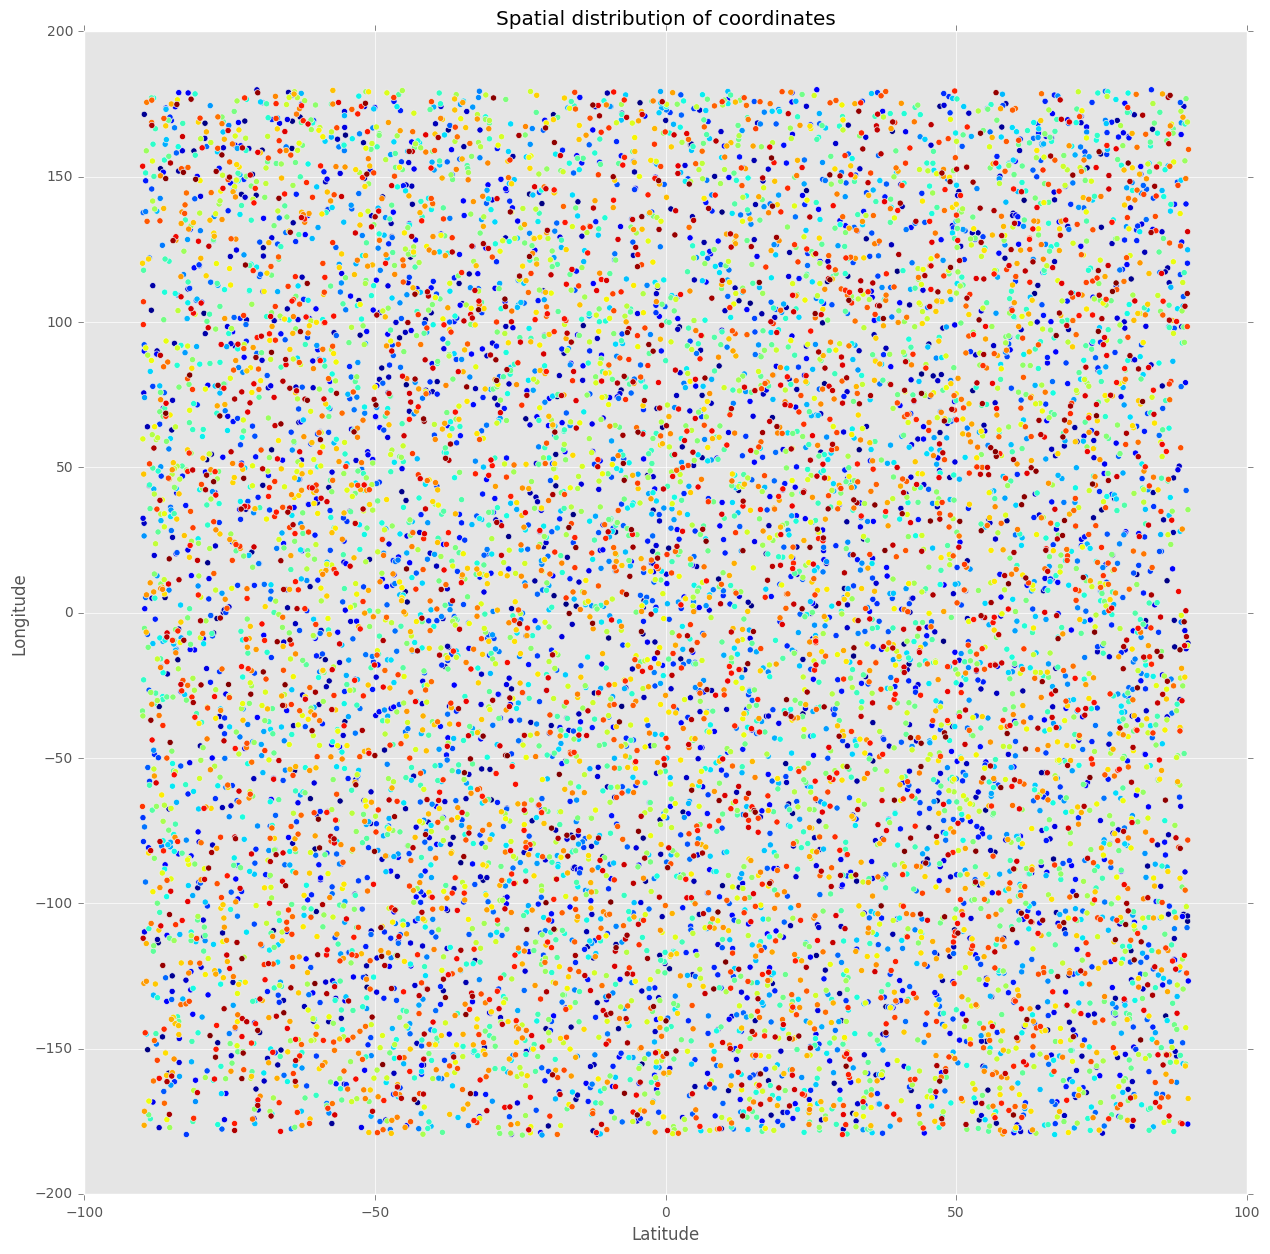

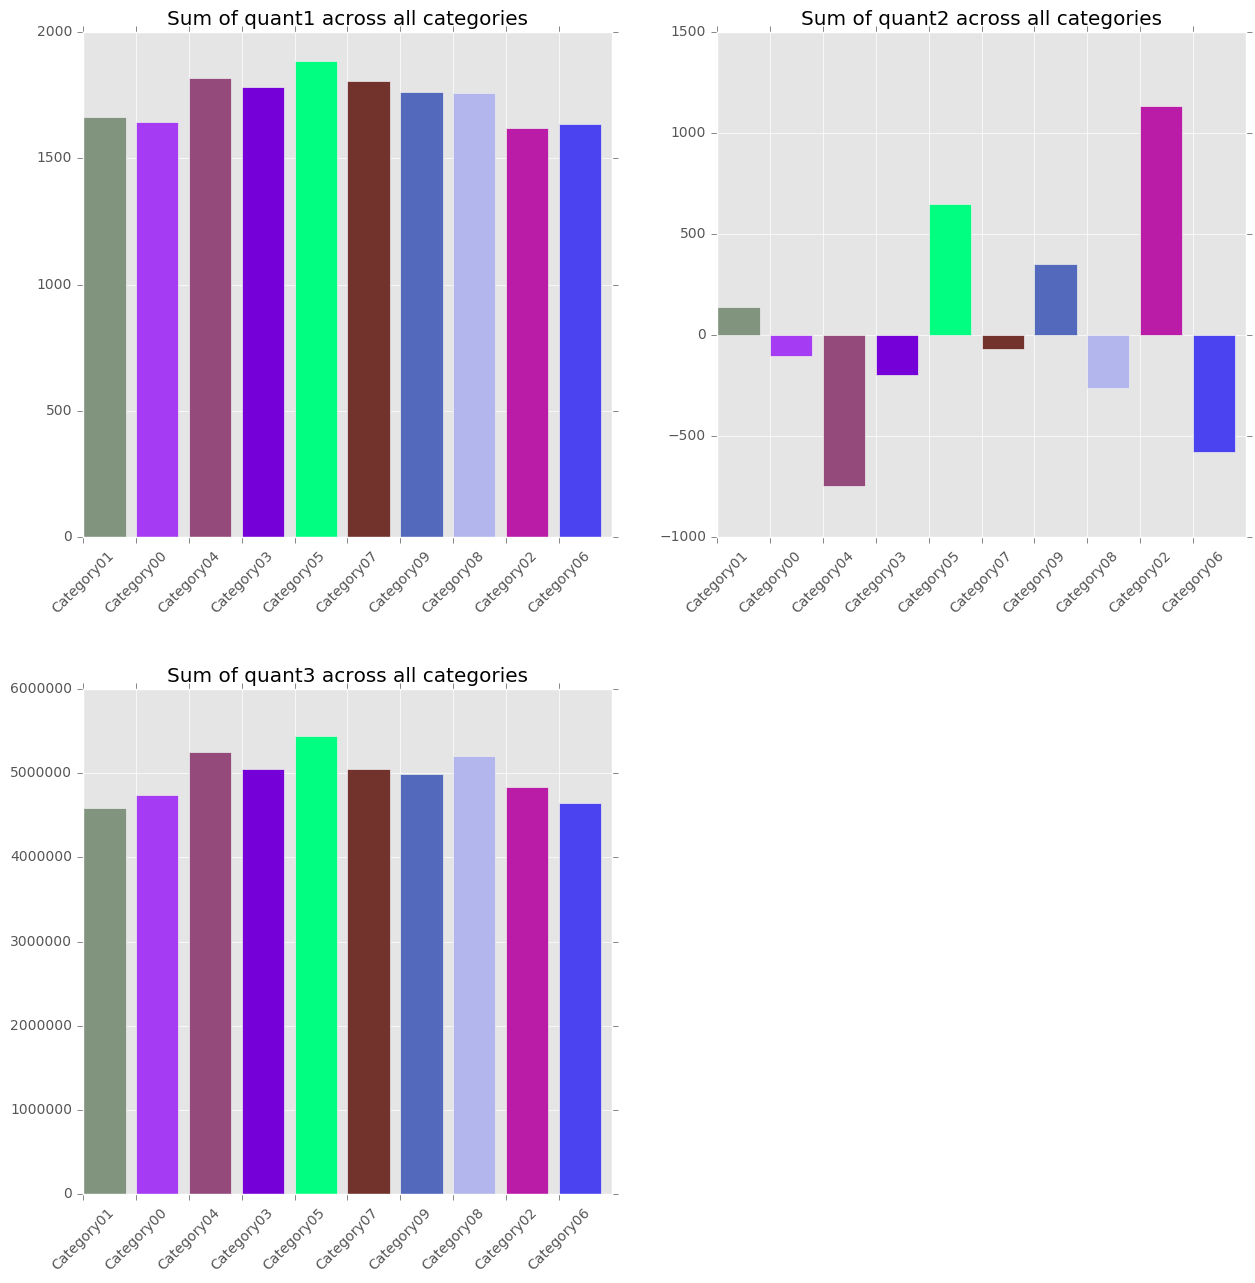

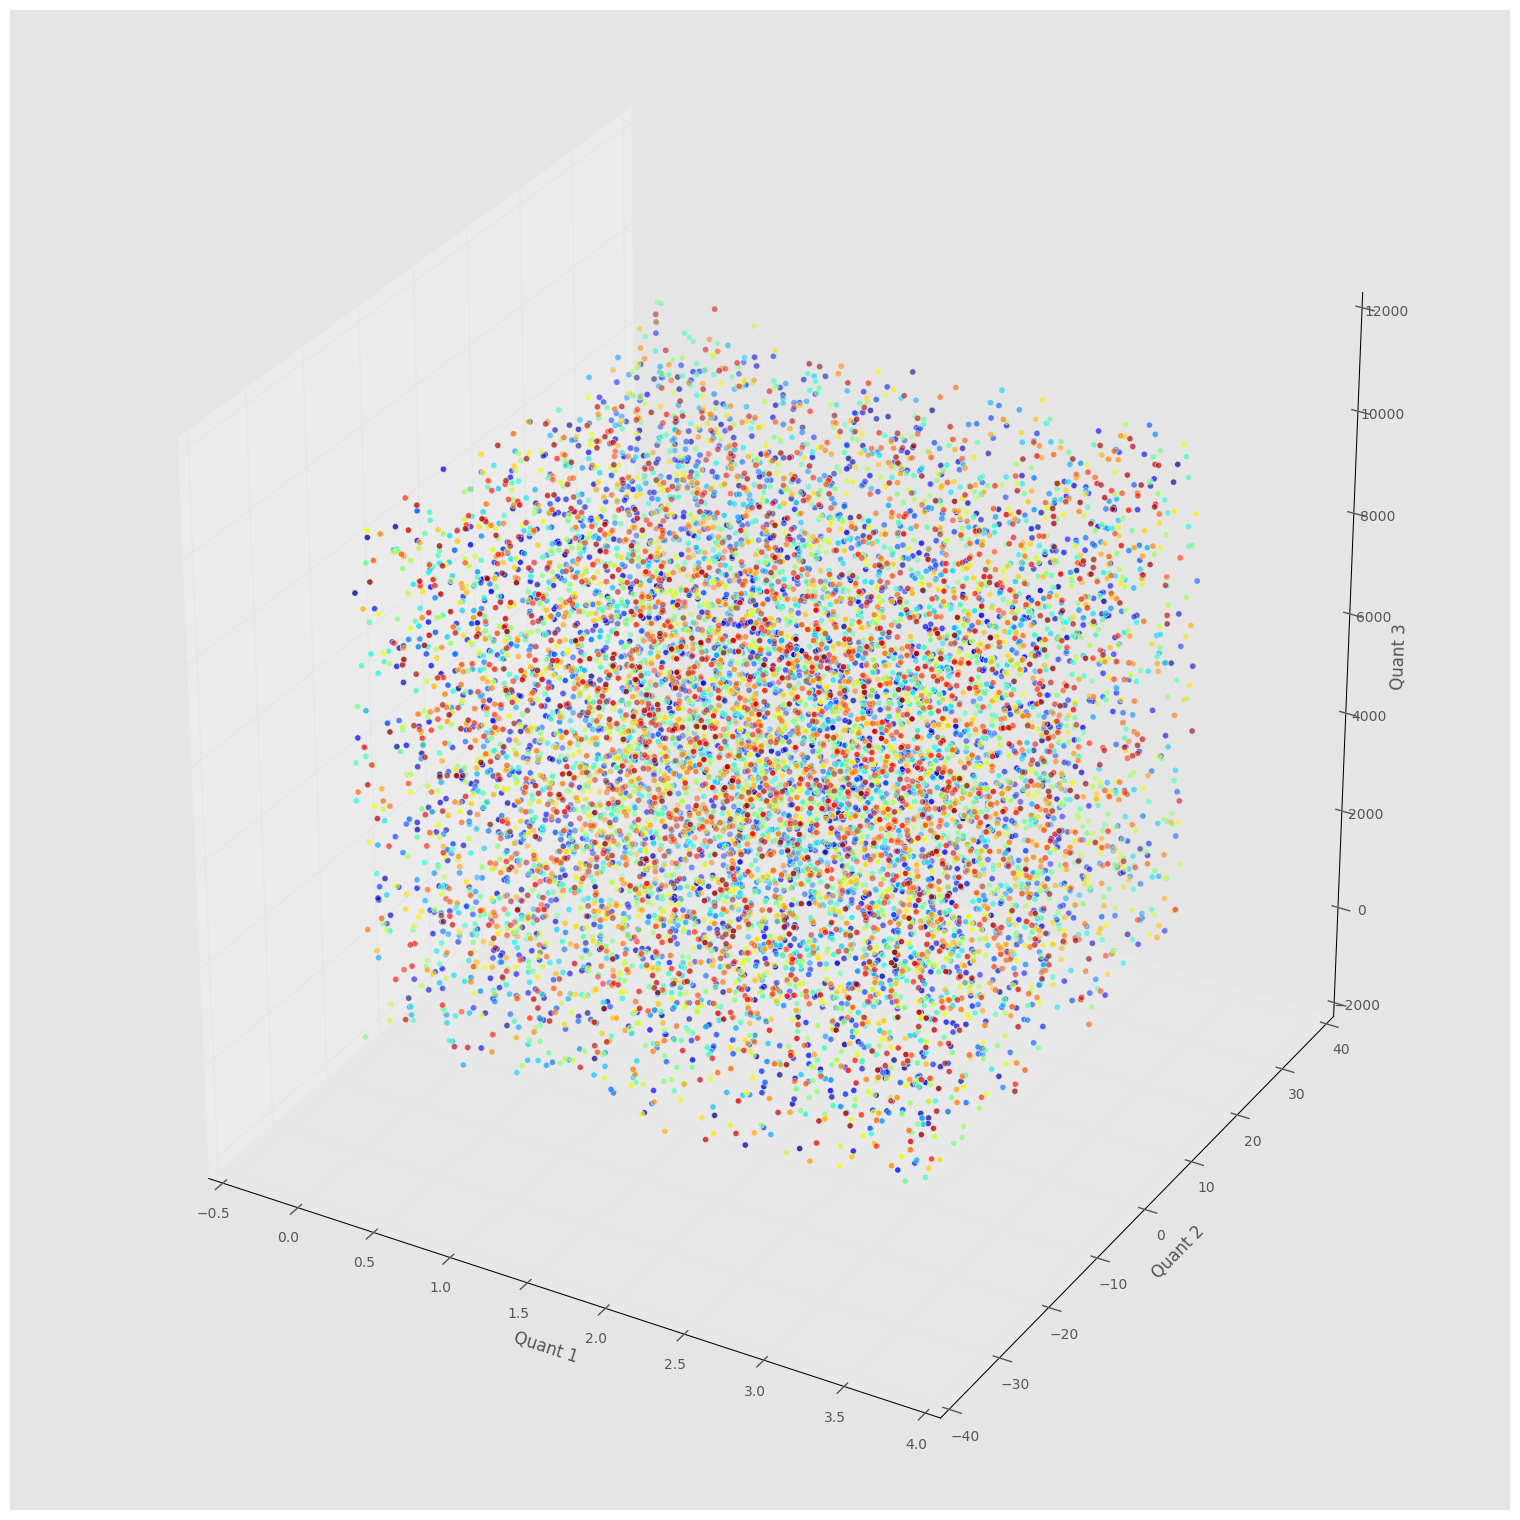

In [43]:
analysis(df)